In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

/home/selun/Dokumente/Sync_Office/00_git/machine-learning-cheatsheet/.venv/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
# Load the Excel file
file_path = '../data/patient_data.csv'
df = pd.read_csv(file_path, delimiter=';')

In [3]:
# Display the first few rows of the dataframe
df.head()

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842,BMI,CardiovascularDisease
0,0,0,0,0,0,0,28.607859,0
1,0,0,1,1,0,0,26.651948,0
2,1,1,1,0,0,1,31.885502,0
3,0,0,1,0,0,0,29.353686,0
4,1,1,0,0,0,0,33.630251,0


In [4]:
df.describe()

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842,BMI,CardiovascularDisease
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.433333,0.326667,0.490000,0.316667,0.286667,0.276667,28.899291,0.113333
std,0.496364,0.469778,0.500735,0.465953,0.452960,0.448098,5.171930,0.317529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.798057,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.292649,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.185791,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.131210,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.188743,1.000000


In [5]:
# Check for missing values
pd.isnull(df).any()

rs1047763                False
rs9282541                False
rs3827760                False
rs4988235                False
rs1801133                False
rs9374842                False
BMI                      False
CardiovascularDisease    False
dtype: bool

In [6]:
# Shows the data types of each column.
print(df.dtypes)

rs1047763                  int64
rs9282541                  int64
rs3827760                  int64
rs4988235                  int64
rs1801133                  int64
rs9374842                  int64
BMI                      float64
CardiovascularDisease      int64
dtype: object


In [7]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in rs1047763: 2
Number of distinct types in rs9282541: 2
Number of distinct types in rs3827760: 2
Number of distinct types in rs4988235: 2
Number of distinct types in rs1801133: 2
Number of distinct types in rs9374842: 2
Number of distinct types in BMI: 300
Number of distinct types in CardiovascularDisease: 2


In [8]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in rs1047763: 2
Number of distinct types in rs9282541: 2
Number of distinct types in rs3827760: 2
Number of distinct types in rs4988235: 2
Number of distinct types in rs1801133: 2
Number of distinct types in rs9374842: 2
Number of distinct types in BMI: 300
Number of distinct types in CardiovascularDisease: 2


In [9]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in rs1047763: 2
Number of distinct types in rs9282541: 2
Number of distinct types in rs3827760: 2
Number of distinct types in rs4988235: 2
Number of distinct types in rs1801133: 2
Number of distinct types in rs9374842: 2
Number of distinct types in BMI: 300
Number of distinct types in CardiovascularDisease: 2


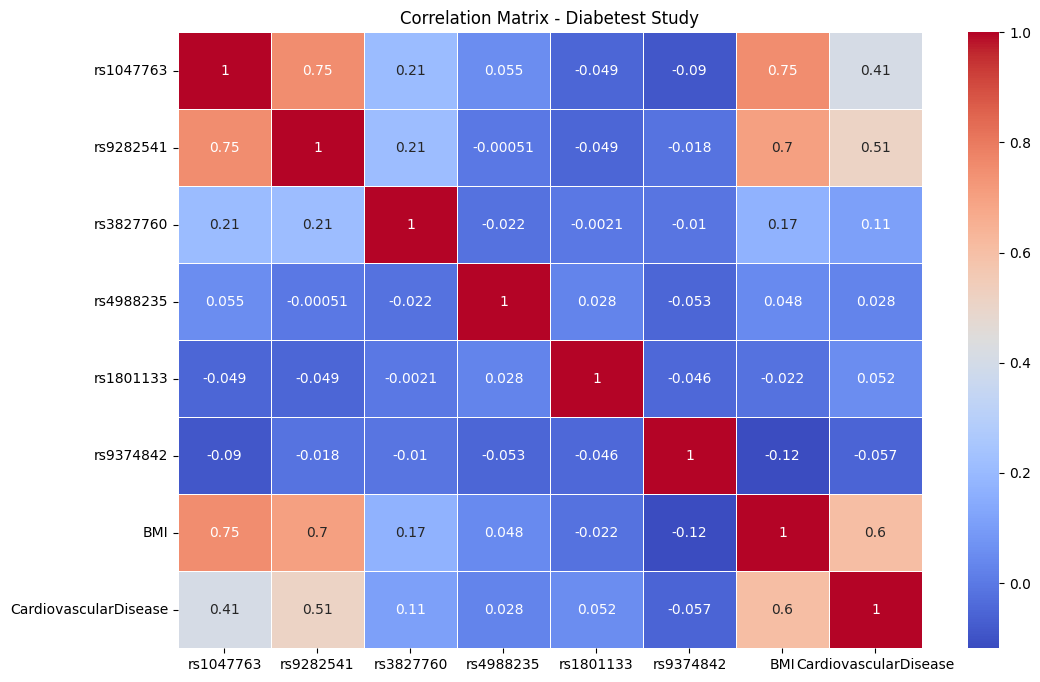

In [10]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Diabetest Study')
plt.show()

In [11]:
#df.loc[:, 'BMI'] = (df['BMI'] * 100).astype(int)
#df.loc[:, 'BloodSugarLevel'] = (df['BloodSugarLevel'] * 100).astype(int)
#df.loc[:, 'BMI'] = (df['BMI']).astype(int)

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('CardiovascularDisease', axis=1)
y = df.CardiovascularDisease
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



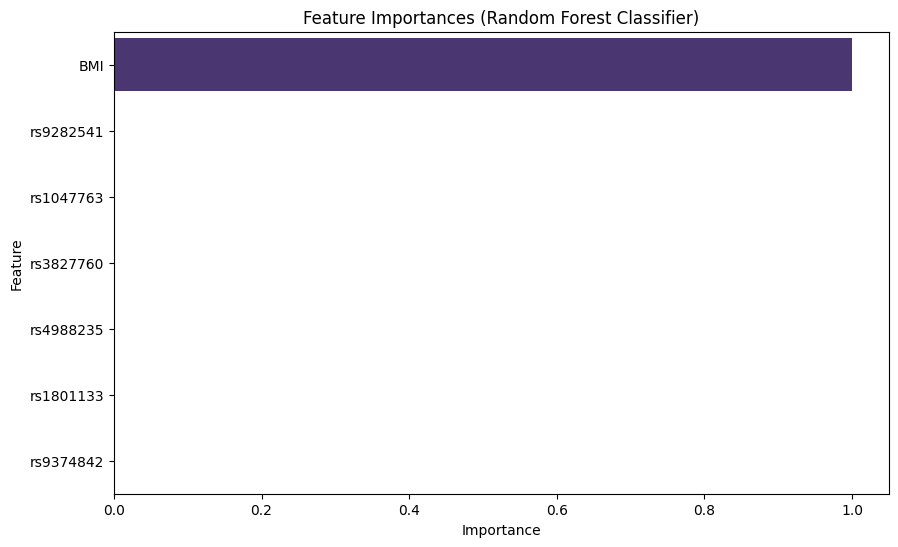

[21:17:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


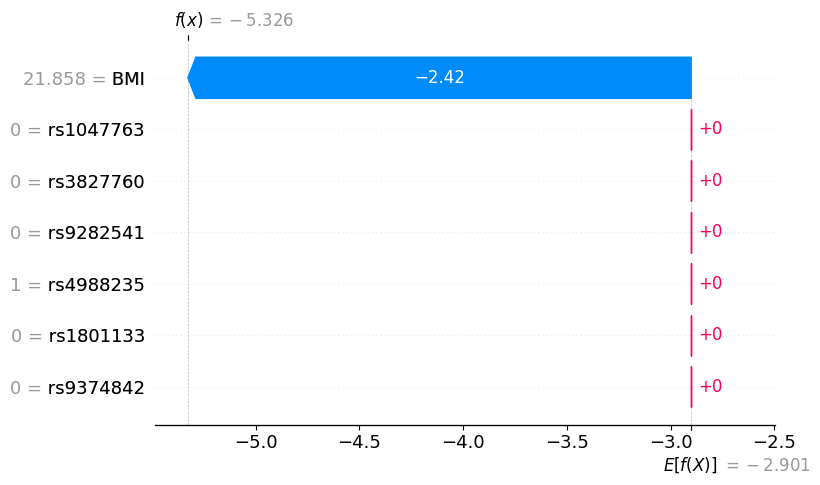

In [13]:
import xgboost as xgb
import shap

model = xgb.XGBClassifier()
model.fit(training_features.values, training_target.values)

# Get feature importances from the trained model
feature_importances = model.feature_importances_
xgb.XGBClassifier
# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': training_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()

expl = shap.TreeExplainer(model)
vals = expl(testing_features)
shap.plots.waterfall(vals[0])

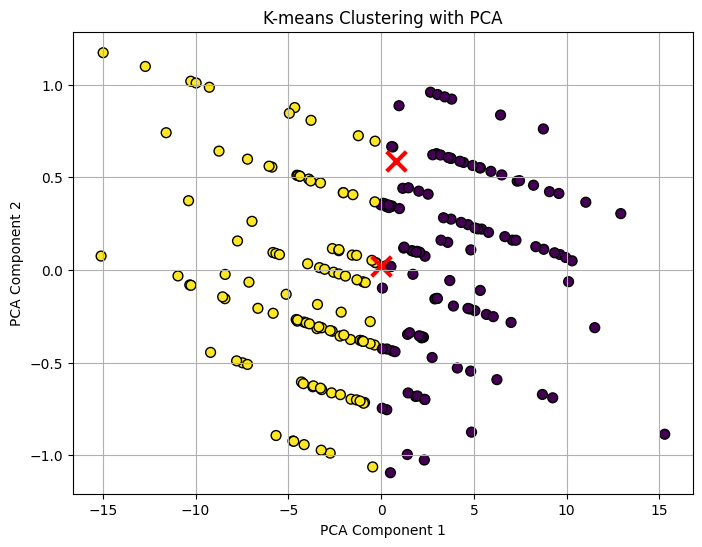

In [14]:
# Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Scale the features using MaxAbsScaler
#scaler = MaxAbsScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)



# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(training_features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(training_features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

X does not have valid feature names, but PCA was fitted with feature names


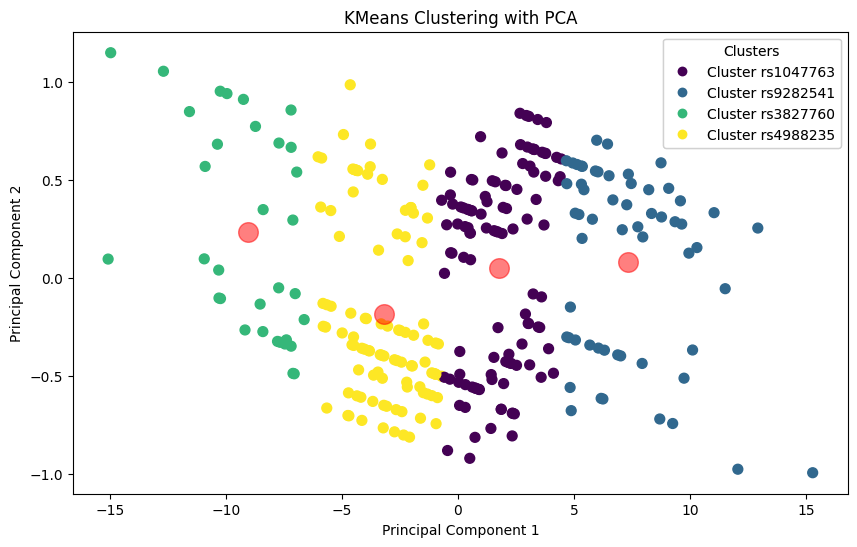

In [19]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the data points and the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids in the reduced space

centers_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', s=200, alpha=0.5)

# Adding a legend
handles, labels = scatter.legend_elements(prop="colors")
legend1 = plt.legend(handles, [f'Cluster {i}' for i in kmeans.feature_names_in_], title="Clusters")
plt.gca().add_artist(legend1)

plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [15]:
# TPOT



# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=50, population_size=50, verbosity=2, random_state=42)
tpot.fit(training_features, training_target)
print(tpot.score(testing_features, testing_target))
tpot.export('tpot_patient_data_pipeline_classifier.py')

                                                                               
Generation 1 - Current best internal CV score: 0.9955555555555555
                                                                               
Generation 2 - Current best internal CV score: 0.9955555555555555
                                                                               
Generation 3 - Current best internal CV score: 1.0
                                                                               
Generation 4 - Current best internal CV score: 1.0
                                                                               
Generation 5 - Current best internal CV score: 1.0
                                                                               
Generation 6 - Current best internal CV score: 1.0
                                                                               
Generation 7 - Current best internal CV score: 1.0
                                                     

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
# Average CV score on the training set was: 1.0
exported_pipeline = exported_pipeline = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.6000000000000001, min_samples_leaf=19, min_samples_split=16, n_estimators=100, subsample=0.8)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, classification_report
print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))
print('Training accuracy:', exported_pipeline.score(training_features, training_target))
print('Testing accuracy:', accuracy_score(testing_target, results))



[[67  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00         8

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Training accuracy: 1.0
Testing accuracy: 1.0




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



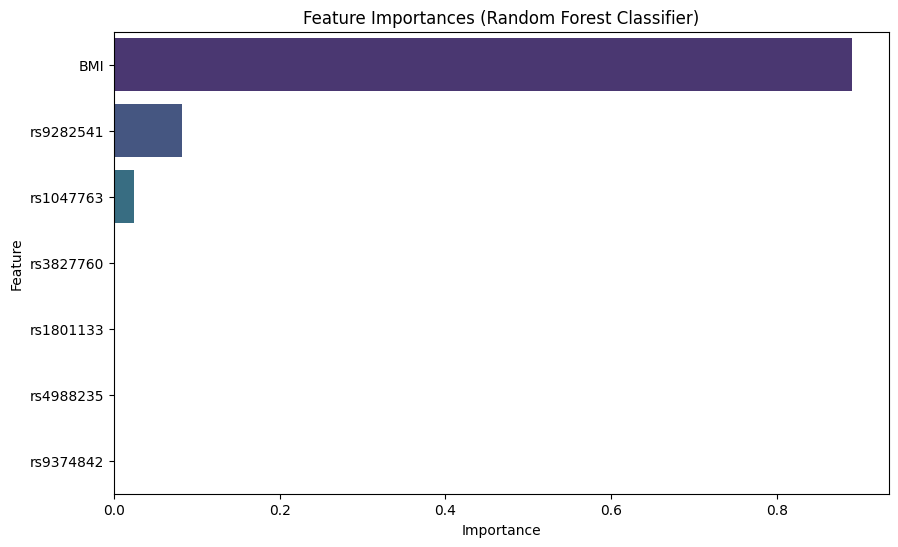

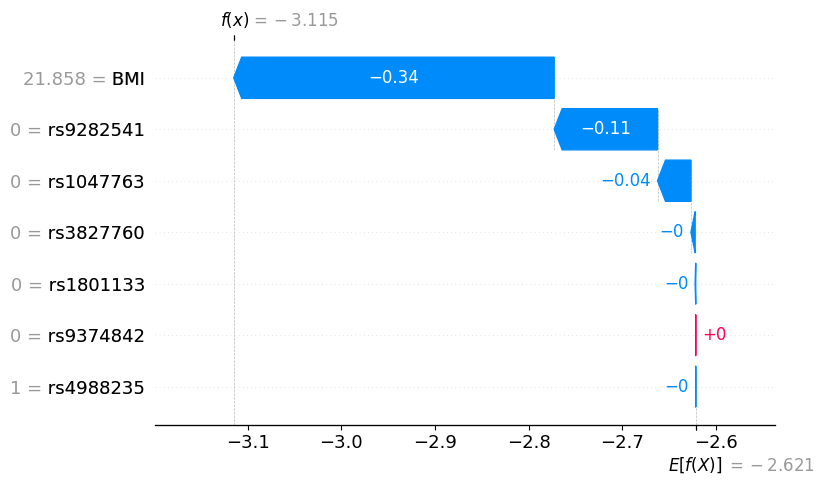

In [23]:
# Get feature importances from the trained model
feature_importances = exported_pipeline.feature_importances_
xgb.XGBClassifier
# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': training_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()

expl = shap.TreeExplainer(exported_pipeline)
vals = expl(testing_features)
shap.plots.waterfall(vals[0])

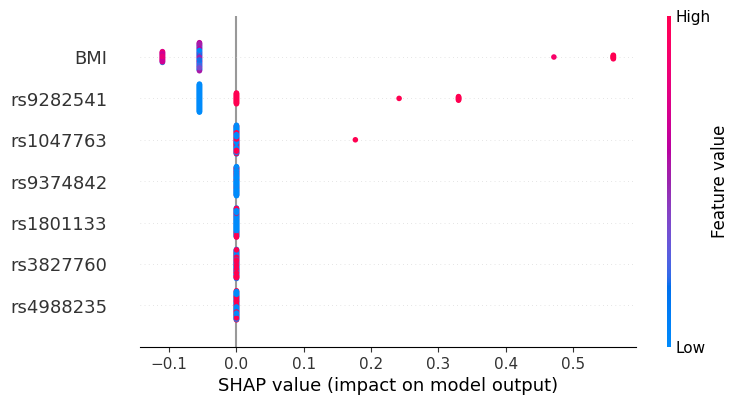

In [22]:
# SHAP
import shap

explainer = shap.Explainer(exported_pipeline.predict, training_features)
shap_values = explainer(testing_features)

# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values)

In [28]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('CardiovascularDisease', axis=1)
y = df.CardiovascularDisease
one_hot_X = pd.get_dummies(X)

# make a train-test split of the data:
X_train, X_test, y_train, y_test = train_test_split(one_hot_X, y, test_size=0.2)

# (limit to depth 2 for better readability of the model) -> ok it's a bit radical, but we want to really see
# what is most important...
dtree = DecisionTreeClassifier(max_depth=2)

# train Decision Tree classifer
dtree = dtree.fit(X_train,y_train)

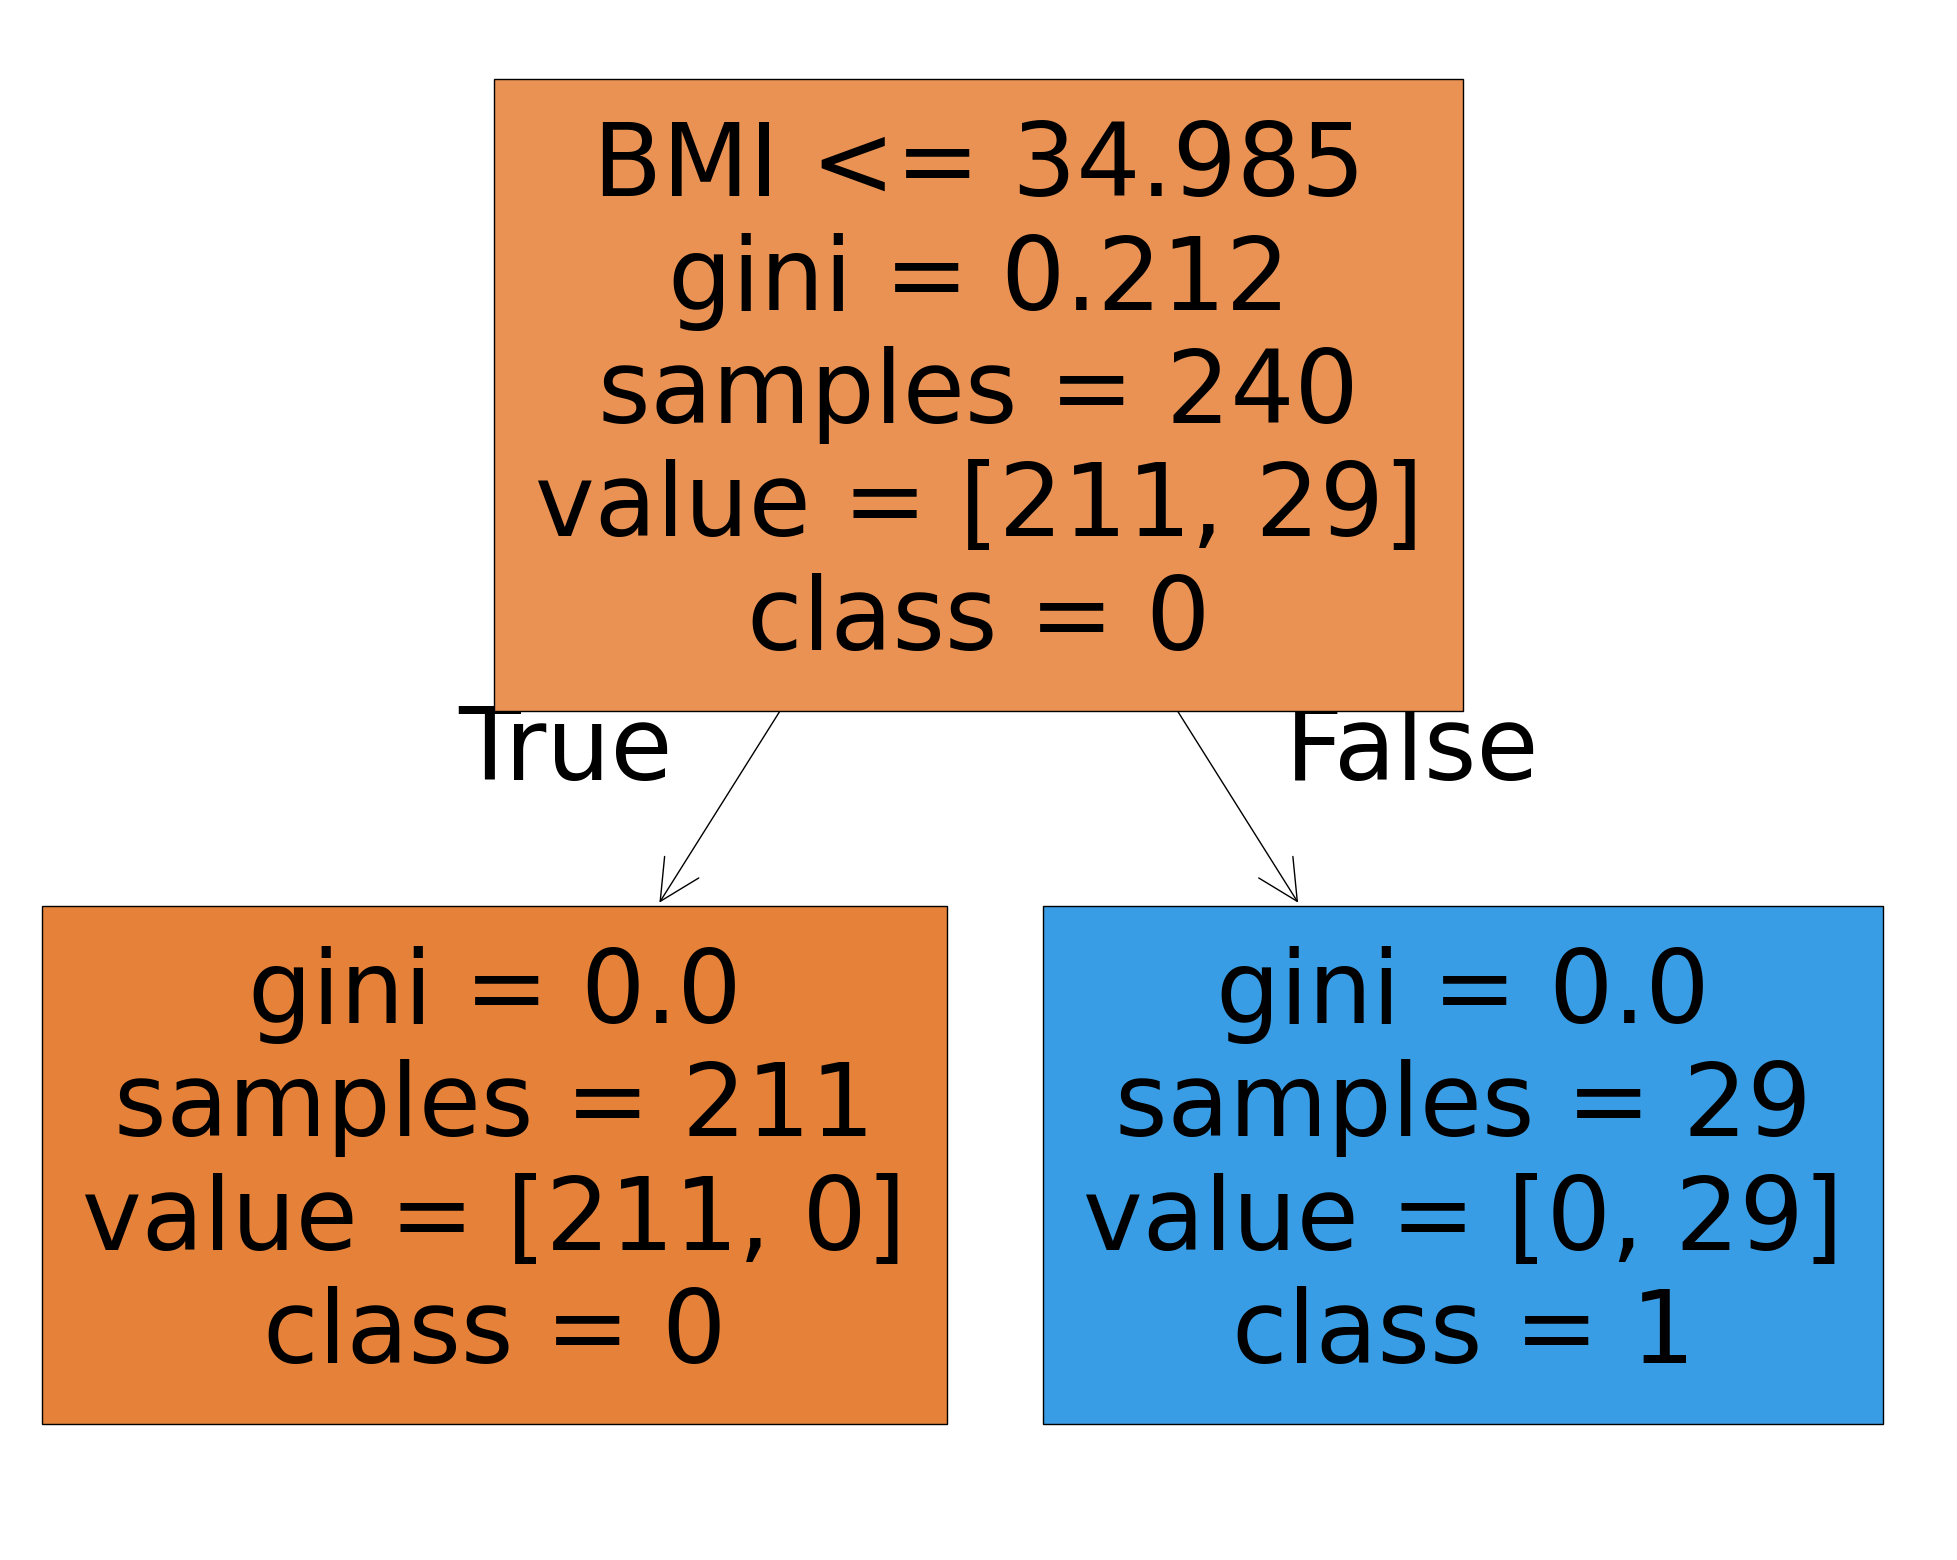

In [29]:
from sklearn import tree

# plot the tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, feature_names=df.columns.values.tolist(), class_names=['0','1'], filled=True)